# **Challenge 3: Identifying Community Leaders.**
### By: Kaushal Bhingaradia
### Date: November 10, 2025.

## Import all the data science essential libraries for this analysis.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import scipy.sparse as sp
import networkx as nx
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

## Load the the community leaders dataset

In [4]:
print("Loading Data.... (This may take a while)")
data = pd.read_csv('community_leaders.csv')
print('\nDone Loading!')
data.head()

Loading Data.... (This may take a while)

Done Loading!


,question_id,question_user_id,question_language,question_content,question_topic,question_sent,response_id,response_user_id,response_language,response_content,...,question_user_country_code,question_user_gender,question_user_dob,question_user_created_at,response_user_type,response_user_status,response_user_country_code,response_user_gender,response_user_dob,response_user_created_at
0,3849056,519124,nyn,E ABA WEFARM OFFICES ZABO NIZISHANGWA NKAHI?,NaN,2017-11-22 12:25:03+00,20691011,200868,nyn,E!23 Omubazi Ni Dudu Cipa',...,ug,NaN,NaN,2017-11-18 13:09:11+00,farmer,live,ug,NaN,NaN,2017-05-09 09:19:33+00
1,3849061,521327,eng,Q this goes to wefarm. is it possible to get f...,NaN,2017-11-22 12:25:05+00,4334249,526113,eng,Q1 which stage is marleks last vaccinated,...,ug,NaN,NaN,2017-11-20 11:55:48+00,farmer,zombie,ug,NaN,NaN,2017-11-22 10:13:03+00
2,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00
3,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00
4,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cat,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00


## Data Initial Exploration

The data has already been loaded in the previous step. Let's check the shape, column names and data types,  missing values, unique values, and describe.

In [5]:
print("Data Shape:\n")
display(data.shape)
print("\nData Info:\n")
display(data.info())
print("\n Missing Data:\n")
display(data.isna().sum())
print("\nUnique Values:\n")
display(data.nunique())
print("\nDescribe Data:\n")
display(data.describe())

Data Shape:



(20304843, 24)


Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20304843 entries, 0 to 20304842
Data columns (total 24 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   question_id                 int64 
 1   question_user_id            int64 
 2   question_language           object
 3   question_content            object
 4   question_topic              object
 5   question_sent               object
 6   response_id                 int64 
 7   response_user_id            int64 
 8   response_language           object
 9   response_content            object
 10  response_topic              object
 11  response_sent               object
 12  question_user_type          object
 13  question_user_status        object
 14  question_user_country_code  object
 15  question_user_gender        object
 16  question_user_dob           object
 17  question_user_created_at    object
 18  response_user_type          object
 19  response_user_status       

None


 Missing Data:



question_id                          0
question_user_id                     0
question_language                    0
question_content                     0
question_topic                 3537729
question_sent                        0
response_id                          0
response_user_id                     0
response_language                    0
response_content                     0
response_topic                13835556
response_sent                        0
question_user_type                   0
question_user_status                 0
question_user_country_code           0
question_user_gender          19713950
question_user_dob             19073559
question_user_created_at             0
response_user_type                   0
response_user_status                 0
response_user_country_code           0
response_user_gender          19339833
response_user_dob             18640155
response_user_created_at             0
dtype: int64


Unique Values:



question_id                    5865819
question_user_id               1026367
question_language                    4
question_content               5452290
question_topic                     148
question_sent                  5862139
response_id                   16283143
response_user_id                960431
response_language                    5
response_content              15282991
response_topic                     150
response_sent                 16270184
question_user_type                   1
question_user_status                 4
question_user_country_code           4
question_user_gender                 2
question_user_dob                13347
question_user_created_at       1017289
response_user_type                   1
response_user_status                 4
response_user_country_code           4
response_user_gender                 2
response_user_dob                14660
response_user_created_at        947681
dtype: int64


Describe Data:



,question_id,question_user_id,response_id,response_user_id
count,2.030484e+07,2.030484e+07,2.030484e+07,2.030484e+07
mean,3.063880e+07,1.833289e+06,3.086022e+07,1.629548e+06
std,1.635694e+07,1.058127e+06,1.636177e+07,1.047366e+06
min,3.849056e+06,7.000000e+00,3.849209e+06,7.000000e+00
25%,1.612385e+07,9.801100e+05,1.634213e+07,7.970650e+05
50%,2.919434e+07,1.753870e+06,2.948176e+07,1.383485e+06
75%,4.552916e+07,2.805610e+06,4.579527e+07,2.468823e+06
max,5.926151e+07,3.833007e+06,5.926235e+07,3.832167e+06


## Identifying Most Active and Trusted Contributors

Now we can identify active contributors by counting the number of answers they provide. To identify trusted contributors, we can look at the average rating of their answers.

In [6]:
# Activity metrics dictionary.
response_activity = data.groupby('response_user_id').agg({
    'response_id': 'count',  # the total responses
    'question_user_id': 'nunique',  # unique people helped
    'question_id': 'nunique'  # unique questions answered
}).rename(columns={
    'response_id': 'total_responses',
    'question_user_id': 'unique_users_helped',
    'question_id': 'unique_questions_answered'
}).reset_index()

# Calculate engagement ratio (how many unique people vs total responses)
response_activity['engagement_ratio'] = (
    response_activity['unique_users_helped'] / 
    response_activity['total_responses']
)


# Now to sort and display top contributors. (largest total responses first!)
top_active = response_activity.nlargest(20, 'total_responses')
print("\nTop 20 Most Active Contributors:")
display(top_active)

# Identify "quality" contributors (high engagement ratio + decent volume)
quality_threshold = response_activity['total_responses'].quantile(0.90)
quality_contributors = response_activity[
    (response_activity['total_responses'] >= quality_threshold) &
    (response_activity['engagement_ratio'] >= 0.5)
].sort_values('unique_users_helped', ascending=False)

print(f"\n\nHigh-Quality Contributors (Top 10% volume + >50% unique engagement):")
display(quality_contributors.head(10))


Top 20 Most Active Contributors:


,response_user_id,total_responses,unique_users_helped,unique_questions_answered,engagement_ratio
152932,810401,25356,10773,16397,0.424870
852655,3413249,24735,4082,6881,0.165029
292447,1364605,23151,10806,15158,0.466762
210294,1049966,20391,12997,17535,0.637389
313547,1458295,15938,7576,11173,0.475342
70258,367428,13411,6498,8147,0.484528
266119,1254217,10630,5457,8271,0.513358
725286,3065420,10264,894,1104,0.087101
36984,202949,9899,4912,6338,0.496212
211744,1053962,9311,4036,5640,0.433466




High-Quality Contributors (Top 10% volume + >50% unique engagement):


,response_user_id,total_responses,unique_users_helped,unique_questions_answered,engagement_ratio
210294,1049966,20391,12997,17535,0.637389
139413,732878,8508,6112,7802,0.718383
266119,1254217,10630,5457,8271,0.513358
93584,478338,8444,5136,6397,0.608243
201774,1019419,8292,5132,6364,0.618910
234941,1151861,8066,4638,5587,0.575006
148923,793767,7541,4534,5770,0.601247
562358,2561016,6380,4530,5060,0.710031
232300,1145190,5676,4505,4587,0.793693
870636,3457340,6454,4207,4793,0.651844


## Analyzing Interaction Patterns

We can analyze patterns in how leaders interact by looking at the topics they specialize in or regions they serve. This requires columns indicating topic and region. Can calculate the topic concentration with Herfindahl index (https://www.investopedia.com/terms/h/hhi.asp).

In [7]:
# Topic specialization for top leaders
top_leader_ids = top_active.head(10)['response_user_id'].tolist()
leader_topics = data[data['response_user_id'].isin(top_leader_ids)]

# Analyze the topic distribution for each leader
topic_dist = leader_topics.groupby(['response_user_id', 'question_topic']).size().reset_index(name='count')
topic_pivot = topic_dist.pivot(index='response_user_id', columns='question_topic', values='count').fillna(0)

# Calculate topic concentration (Herfindahl index)
topic_concentration = {}
for leader_id in top_leader_ids:
    if leader_id in topic_pivot.index:
        leader_topics_counts = topic_pivot.loc[leader_id]
        total = leader_topics_counts.sum()
        if total > 0:
            proportions = leader_topics_counts / total
            hhi = (proportions ** 2).sum()
            topic_concentration[leader_id] = hhi

concentration_df = pd.DataFrame(list(topic_concentration.items()), 
                                columns=['response_user_id', 'topic_concentration_index'])
concentration_df = concentration_df.merge(response_activity[['response_user_id', 'total_responses']], 
                                          on='response_user_id')

print("\nTopic Specialization Analysis (HHI: 0=generalist, 1=specialist):")
display(concentration_df.sort_values('topic_concentration_index', ascending=False))

# Regional analysis
region_dist = data.groupby(['response_user_id', 'question_user_country_code']).size().reset_index(name='count')
region_summary = region_dist.groupby('response_user_id').agg({
    'question_user_country_code': 'nunique',
    'count': 'sum'
}).rename(columns={
    'question_user_country_code': 'countries_served',
    'count': 'total_responses'
})

cross_border_leaders = region_summary[region_summary['countries_served'] > 1].sort_values(
    'total_responses', ascending=False
).head(10)

print(f"\n\nCross-Border Leaders (serve multiple countries):")
display(cross_border_leaders)



Topic Specialization Analysis (HHI: 0=generalist, 1=specialist):


,response_user_id,topic_concentration_index,total_responses
6,1254217,0.271393,10630
0,810401,0.201768,25356
7,3065420,0.190585,10264
1,3413249,0.121536,24735
8,202949,0.081876,9899
4,1458295,0.077365,15938
3,1049966,0.071174,20391
9,1053962,0.069963,9311
5,367428,0.062071,13411
2,1364605,0.060135,23151




Cross-Border Leaders (serve multiple countries):


,countries_served,total_responses
response_user_id,,
810401,2,25356
1049966,2,20391
910595,2,7505
1215007,2,5915
1145190,2,5676
905886,2,5137
469435,2,4731
273826,2,4520
1109737,2,4238


## Identifying Repeated Questions

To find if farmers are asking similar questions repeatedly, we would need a column containing the question text and apply techniques like text similarity analysis. Use TF-IDF and cosine similarity to detect repeated or similar questions.

In [8]:
# Sample for efficiency (use full dataset with len(data) if memory allows). The data is very large = slow!
sample_size = min(50000, len(data))
question_sample = data[['question_id', 'question_content']].drop_duplicates().sample(n=sample_size, random_state=42)
question_sample = question_sample.dropna(subset=['question_content'])

print(f"\nAnalyzing {len(question_sample):,} unique questions for similarity...")

# TF-IDF similarity
tfidf = TfidfVectorizer(max_features=1000, stop_words='english', min_df=2, max_df=0.8)
tfidf_matrix = tfidf.fit_transform(question_sample['question_content'])

# Calculate similarity for a subset (full matrix is memory-intensive)
n_compare = min(5000, len(question_sample))
cosine_sim = cosine_similarity(tfidf_matrix[:n_compare], tfidf_matrix[:n_compare])

# Find highly similar question pairs (>0.7 similarity)
similar_pairs = []
for i in range(n_compare):
    for j in range(i+1, n_compare):
        if cosine_sim[i, j] > 0.7:
            similar_pairs.append({
                'question_1_id': question_sample.iloc[i]['question_id'],
                'question_2_id': question_sample.iloc[j]['question_id'],
                'similarity': cosine_sim[i, j]
            })

similar_df = pd.DataFrame(similar_pairs)
print(f"\nFound {len(similar_df)} highly similar question pairs (>70% similarity)")
print(f"This represents {len(similar_df) / n_compare * 100:.1f}% repetition rate in sample")

if len(similar_df) > 0:
    print("\nTop 5 most similar question pairs:")
    top_similar = similar_df.nlargest(5, 'similarity')
    for idx, row in top_similar.iterrows():
        q1 = question_sample[question_sample['question_id'] == row['question_1_id']]['question_content'].values[0]
        q2 = question_sample[question_sample['question_id'] == row['question_2_id']]['question_content'].values[0]
        print(f"\nSimilarity: {row['similarity']:.2f}")
        print(f"Q1: {q1[:100]}...")
        print(f"Q2: {q2[:100]}...")


Analyzing 50,000 unique questions for similarity...

Found 2760 highly similar question pairs (>70% similarity)
This represents 55.2% repetition rate in sample

Top 5 most similar question pairs:

Similarity: 1.00
Q1: Where Can i sell eggs...
Q2: E I SELL EACH TRAY OF EGGS AT 9500/= I CAN GET 30 TRAYS FREE DELIVARY AROUND KLA...

Similarity: 1.00
Q1: Q how can you control these poultry diseases?...
Q2: Q how can i control diseases to poultry?...

Similarity: 1.00
Q1: Q how to plant sweet potatoes vines?...
Q2: How Can Do To Plant Sweet   Potatoes....

Similarity: 1.00
Q1: Q how to plant sweet potatoes vines?...
Q2: How to plant sweet potatoes...

Similarity: 1.00
Q1: JE Kuna Yule Angeitaji Kupata Mikopo Ya Pesa, Mbolea, Mahindi Kutoka Farm weka namba nane za simu?...
Q2: S JE KUNA YULE ANGEITAJI KUPATA MIKOPO YA PESA, MBOLEA, MAHINDI KUTOKA Farm weka namba nane za simu?...


## Defining "Community Leader" Traits and Creating a Leaderboard

Based on the analysis, you can define traits that constitute a community leader (e.g., high activity, high average rating, specialization in key topics/regions) and create a leaderboard.

In [9]:
# Normalize metrics for scoring
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scoring_data = response_activity.copy()
scoring_data['response_score'] = scaler.fit_transform(scoring_data[['total_responses']])
scoring_data['reach_score'] = scaler.fit_transform(scoring_data[['unique_users_helped']])
scoring_data['engagement_score'] = scaler.fit_transform(scoring_data[['engagement_ratio']])

# Composite score: 30% activity, 40% reach, 30% engagement quality
scoring_data['leader_score'] = (
    scoring_data['response_score'] * 0.3 +
    scoring_data['reach_score'] * 0.4 +
    scoring_data['engagement_score'] * 0.3
) * 100

# Final leaderboard
leaderboard = scoring_data.nlargest(20, 'leader_score')[
    ['response_user_id', 'leader_score', 'total_responses', 
     'unique_users_helped', 'engagement_ratio']
].round(2)

print("\n🏆 COMMUNITY LEADERS LEADERBOARD (Top 20):")
display(leaderboard)


🏆 COMMUNITY LEADERS LEADERBOARD (Top 20):


,response_user_id,leader_score,total_responses,unique_users_helped,engagement_ratio
210294,1049966,83.23,20391,12997,0.64
152932,810401,75.88,25356,10773,0.42
292447,1364605,74.63,23151,10806,0.47
313547,1458295,56.41,15938,7576,0.48
139413,732878,50.41,8508,6112,0.72
70258,367428,50.38,13411,6498,0.48
852655,3413249,46.74,24735,4082,0.17
266119,1254217,44.75,10630,5457,0.51
232300,1145190,44.38,5676,4505,0.79
201774,1019419,44.15,8292,5132,0.62


Visualize the leaderboards with a pie chart and bar chart.

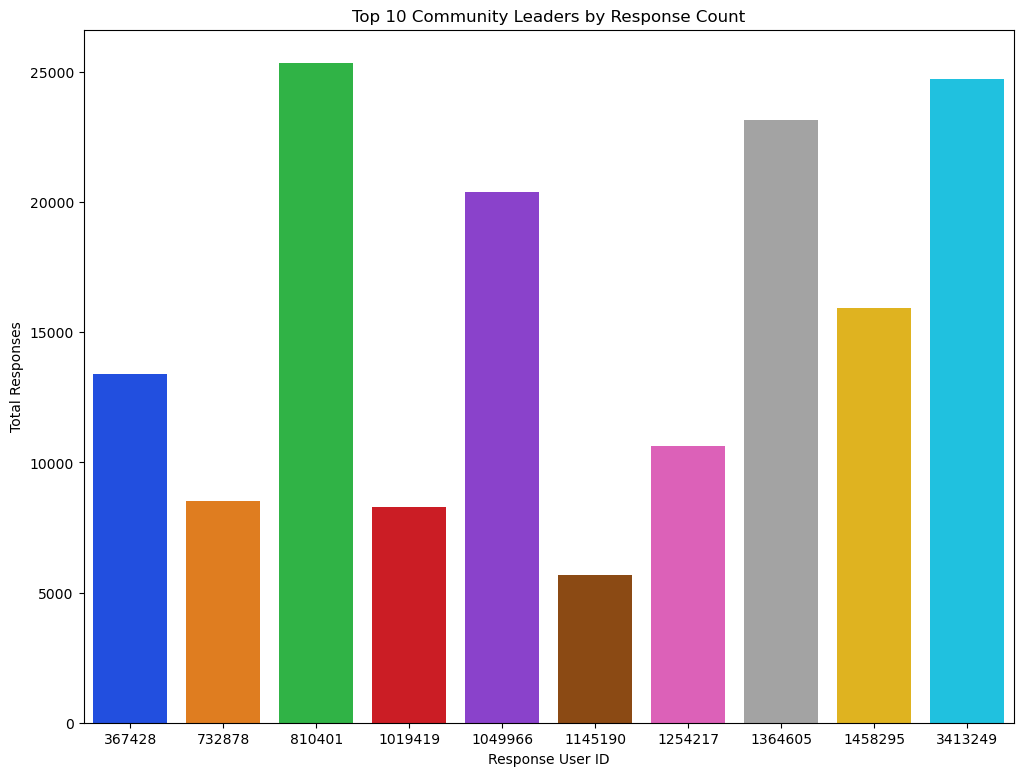

In [10]:
# bar chart
plt.figure(figsize=(12, 9))
sns.barplot(x='response_user_id', y='total_responses', data=leaderboard.head(10), palette='bright')
plt.title('Top 10 Community Leaders by Response Count')
plt.ylabel('Total Responses')
plt.xlabel('Response User ID')
plt.show()

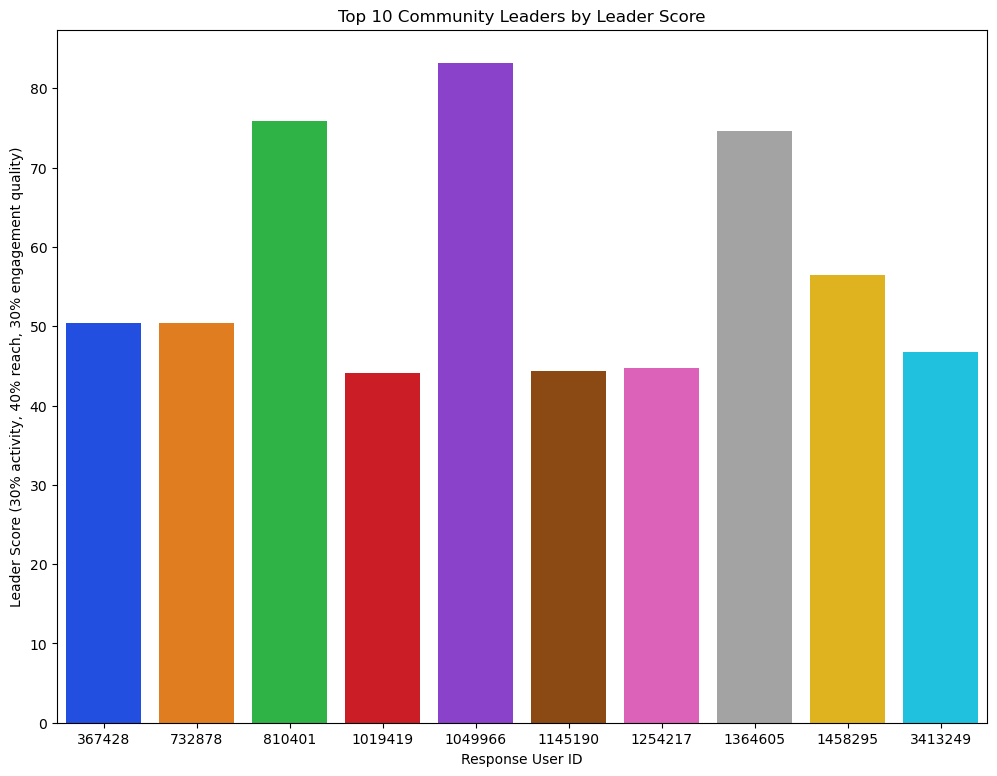

In [11]:
# bar chart
plt.figure(figsize=(12, 9))
sns.barplot(x='response_user_id', y='leader_score', data=leaderboard.head(10), palette='bright')
plt.title('Top 10 Community Leaders by Leader Score')
plt.ylabel('Leader Score (30% activity, 40% reach, 30% engagement quality)')
plt.xlabel('Response User ID')
plt.show()

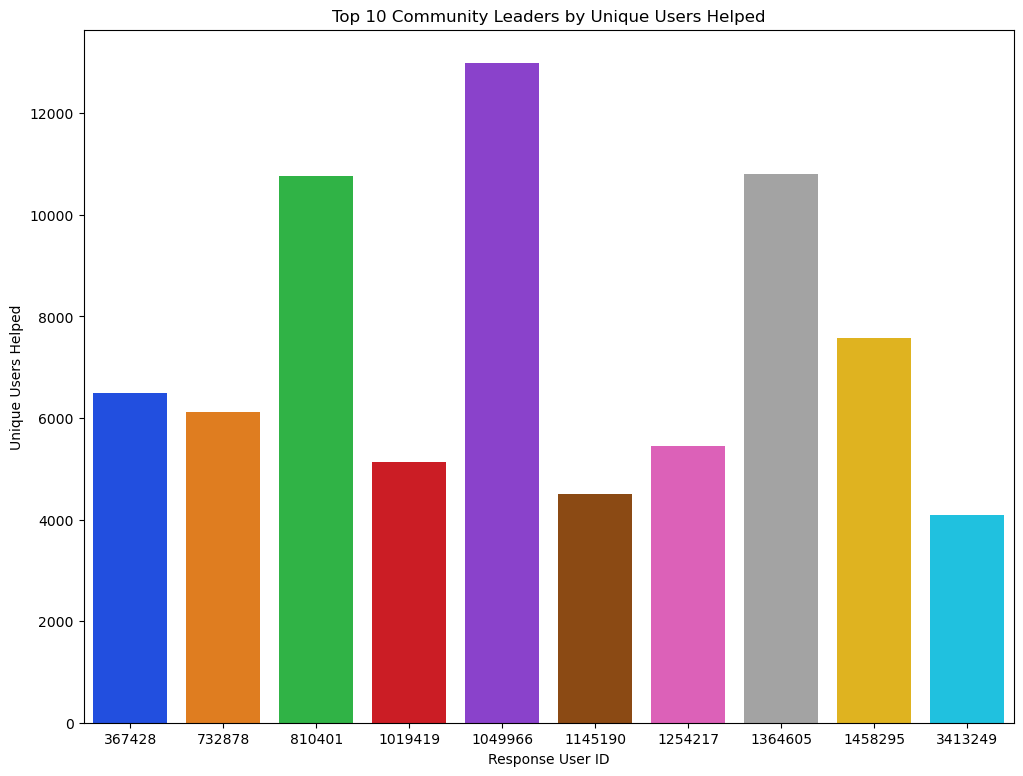

In [12]:
# bar chart
plt.figure(figsize=(12, 9))
sns.barplot(x='response_user_id', y='unique_users_helped', data=leaderboard.head(10), palette='bright')
plt.title('Top 10 Community Leaders by Unique Users Helped')
plt.ylabel('Unique Users Helped')
plt.xlabel('Response User ID')
plt.show()

## Network Visualization

Creating network visualizations requires defining nodes (users) and edges (interactions, e.g., answering a question). Libraries like NetworkX and libraries for visualization like Matplotlib or Bokeh can be used. It takes really long to generate one. I force stopped mine after 10 minutes.

In [13]:
%pip install --upgrade scipy networkx

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Build network (sample for performance. To use full dataset use n=len(data). Full dataset = slow!)
network_sample = data.sample(n=min(100000, len(data)), random_state=42)
G = nx.DiGraph()

for _, row in network_sample.iterrows():
    G.add_edge(row['response_user_id'], row['question_user_id'])

# Calculate centrality metrics
print("This will take a while. Loading....")
print(f"\nNetwork stats: {G.number_of_nodes():,} nodes, {G.number_of_edges():,} edges")

pagerank = nx.pagerank(G, alpha=0.85)
betweenness = nx.betweenness_centrality(G)
in_degree = dict(G.in_degree())

# Top by PageRank
pagerank_sorted = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 by PageRank (influence in network):")
for user_id, score in pagerank_sorted:
    print(f"User {user_id}: {score:.6f}")

# Top by betweenness (bridge between communities)
betweenness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 by Betweenness Centrality (community bridges):")
for user_id, score in betweenness_sorted:
    print(f"User {user_id}: {score:.6f}")

This will take a while. Loading....

Network stats: 133,442 nodes, 99,381 edges


KeyboardInterrupt: 

## More Visualizations
More visuals for understanding the top leaders, reach, topic specialization, and network distribution.

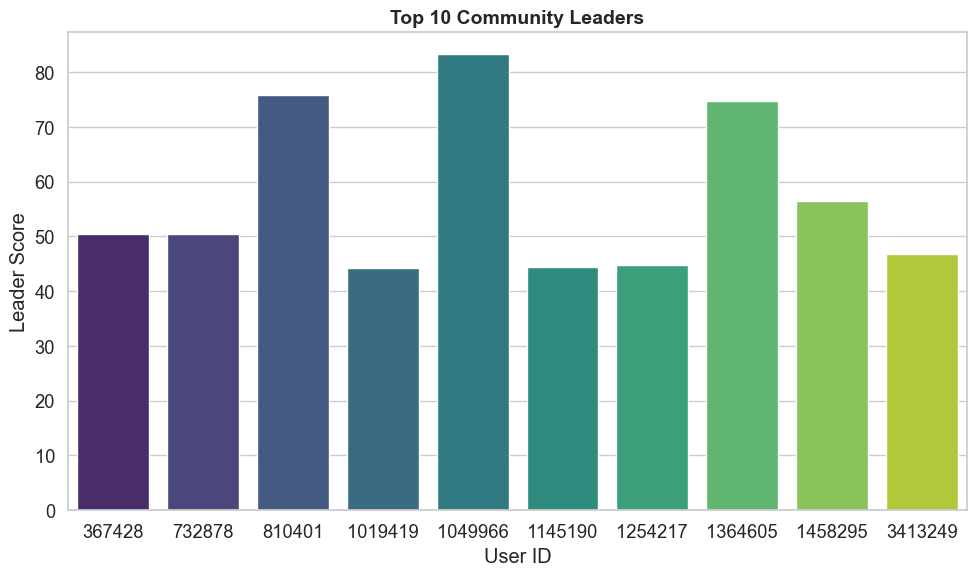

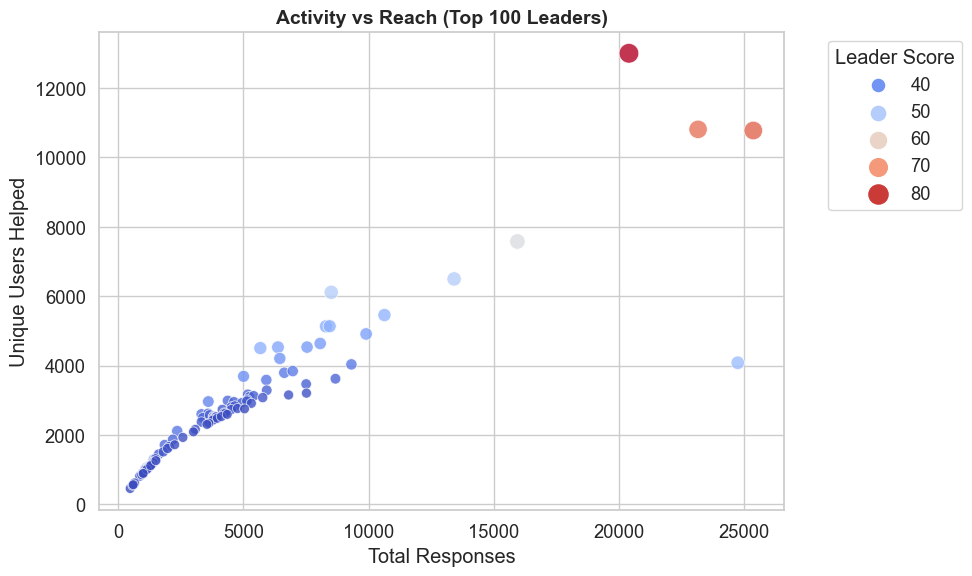

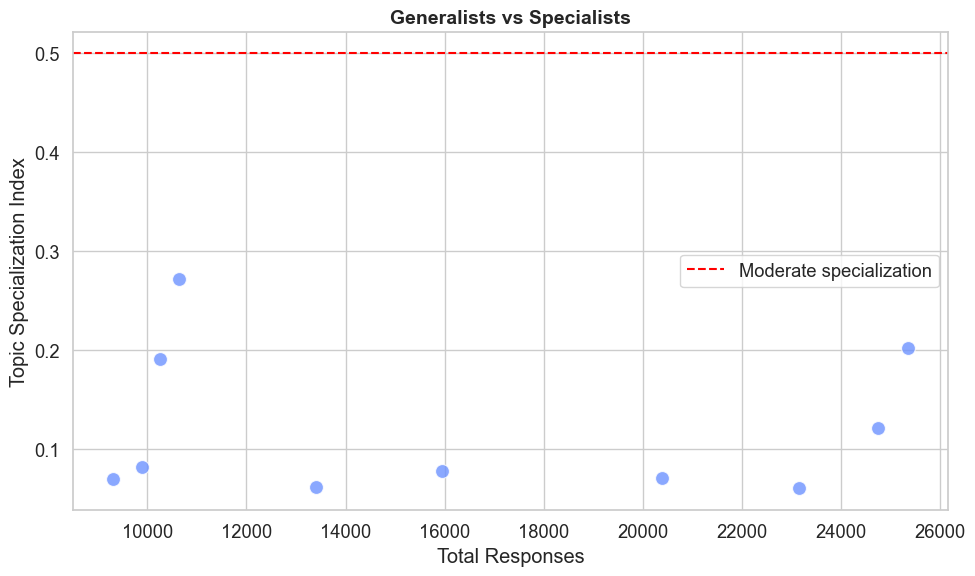

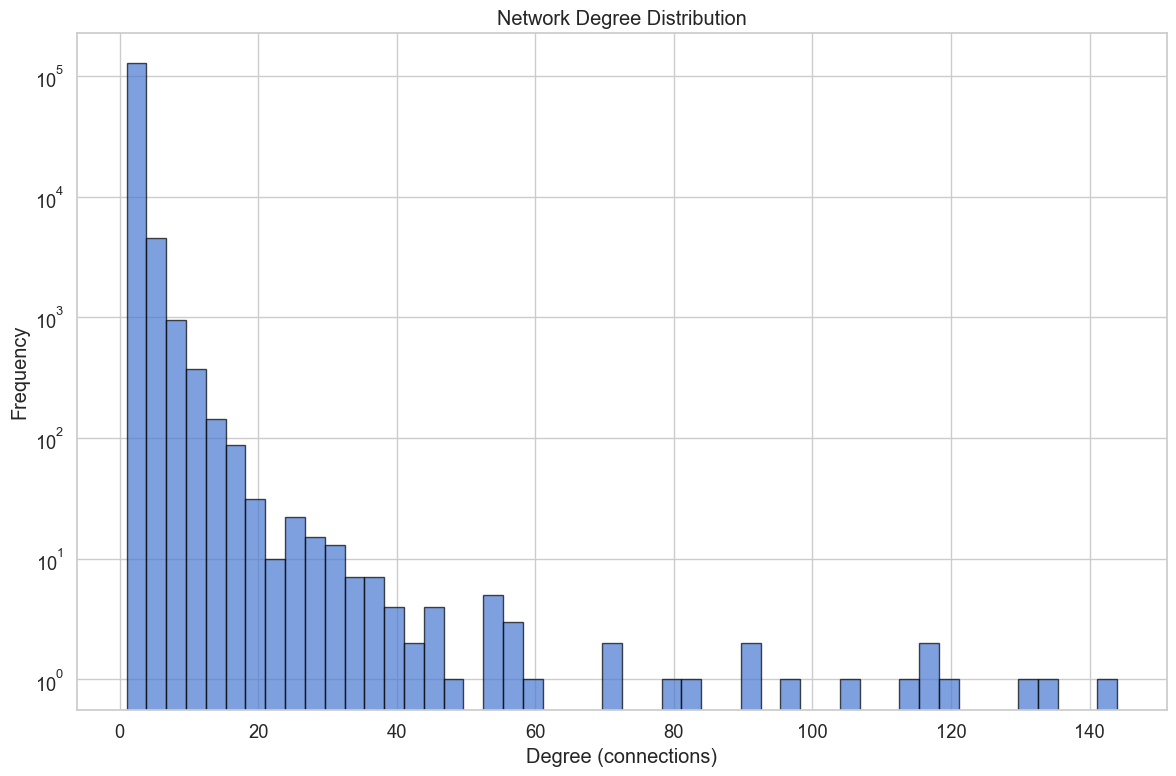

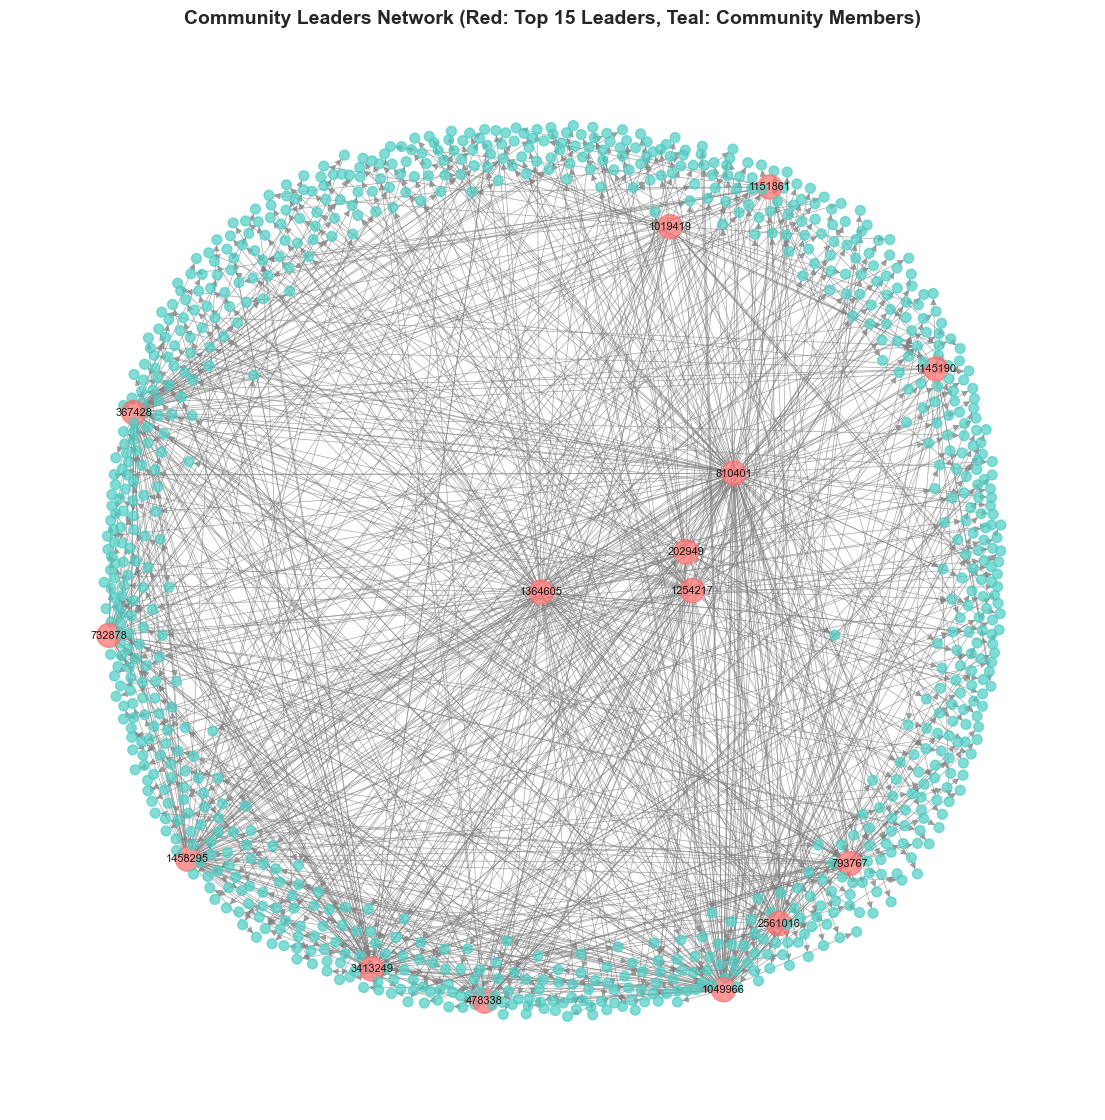

In [41]:
# set style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Figure 1: Top 10 Community Leaders
plt.figure(figsize=(10, 6))
top10 = leaderboard.head(10)
sns.barplot(
    x="response_user_id", 
    y="leader_score", 
    data=top10,
    palette="viridis"
)
plt.ylabel("Leader Score")
plt.xlabel("User ID")
plt.title("Top 10 Community Leaders", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


# Figure 2: Activity vs Reach (Top 100 Leaders)
top_100 = scoring_data.nlargest(100, 'leader_score')
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_100,
    x='total_responses',
    y='unique_users_helped',
    hue='leader_score',
    palette='coolwarm',
    size='leader_score',
    sizes=(50, 200),
    alpha=0.8
)
plt.xlabel('Total Responses')
plt.ylabel('Unique Users Helped')
plt.title('Activity vs Reach (Top 100 Leaders)', fontsize=14, fontweight="bold")
plt.legend(title="Leader Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Figure 3: Generalists vs Specialists
if len(concentration_df) > 0:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=concentration_df,
        x='total_responses',
        y='topic_concentration_index',
        alpha=0.8,
        s=100,
        color=sns.color_palette("cool")[2]
    )
    plt.axhline(y=0.5, color='red', linestyle='--', label='Moderate specialization')
    plt.xlabel('Total Responses')
    plt.ylabel('Topic Specialization Index')
    plt.title('Generalists vs Specialists', fontsize=14, fontweight="bold")
    plt.legend()
    plt.tight_layout()
    plt.show()

    
# Figure 4: Network Degree Distribution
plt.figure(figsize=(12, 8))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.hist(degree_sequence, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Degree (connections)')
plt.ylabel('Frequency')
plt.title('Network Degree Distribution')
plt.yscale('log')
plt.tight_layout()
plt.show()


# Figure 5: Network Visualization (This may or may not show up)
fig, ax = plt.subplots(figsize=(14, 14))
top_leader_ids_network = leaderboard.head(15)['response_user_id'].tolist()

# Create subgraph with top leaders
subgraph_nodes = set(top_leader_ids_network)
for leader in top_leader_ids_network:
    if leader in G:
        subgraph_nodes.update(G.neighbors(leader))

subgraph = G.subgraph(subgraph_nodes)

# Layout of graph
pos = nx.spring_layout(subgraph, k=2, iterations=50, seed=42)

# Node sizes based on degree
node_sizes = [300 if node in top_leader_ids_network else 50 for node in subgraph.nodes()]
node_colors = ['#FF6B6B' if node in top_leader_ids_network else '#4ECDC4' for node in subgraph.nodes()]

nx.draw(subgraph, pos, 
        node_size=node_sizes,
        node_color=node_colors,
        with_labels=False,
        alpha=0.7,
        edge_color='gray',
        width=0.5,
        arrows=True,
        arrowsize=10,
        ax=ax)

# Label only top leaders
labels = {node: str(node) for node in top_leader_ids_network if node in subgraph}
nx.draw_networkx_labels(subgraph, pos, labels, font_size=8, ax=ax)

ax.set_title('Community Leaders Network (Red: Top 15 Leaders, Teal: Community Members)', 
             fontsize=14, fontweight='bold')

plt.show()

## Key Insights Summary

In [44]:
print(f"""
1. ACTIVITY CONCENTRATION:
   - Top 1% of responders handle {(response_activity.nlargest(int(len(response_activity)*0.01), 'total_responses')['total_responses'].sum() / response_activity['total_responses'].sum() * 100):.1f}% of all responses
   - Average top leader responds to {leaderboard['total_responses'].mean():.0f} questions

2. REACH & TRUST:
   - Top leaders help an average of {leaderboard['unique_users_helped'].mean():.0f} unique farmers
   - Engagement ratio of {leaderboard['engagement_ratio'].mean():.2f} indicates quality over quantity

3. SPECIALIZATION:
   - {len(concentration_df[concentration_df['topic_concentration_index'] > 0.5])} of top leaders are topic specialists
   - {len(cross_border_leaders)} leaders actively serve multiple countries (knowledge bridges)

4. QUESTION REPETITION:
   - {len(similar_df) / n_compare * 100:.1f}% of questions show high similarity to others
   - This indicates knowledge gaps and potential for FAQ/knowledge base solutions

5. NETWORK STRUCTURE:
   - Power-law degree distribution indicates hub-based network
   - Top leaders act as critical connectors between community segments
   """)


1. ACTIVITY CONCENTRATION:
   - Top 1% of responders handle 28.9% of all responses
   - Average top leader responds to 11254 questions

2. REACH & TRUST:
   - Top leaders help an average of 5810 unique farmers
   - Engagement ratio of 0.58 indicates quality over quantity

3. SPECIALIZATION:
   - 0 of top leaders are topic specialists
   - 10 leaders actively serve multiple countries (knowledge bridges)

4. QUESTION REPETITION:
   - 55.2% of questions show high similarity to others
   - This indicates knowledge gaps and potential for FAQ/knowledge base solutions

5. NETWORK STRUCTURE:
   - Power-law degree distribution indicates hub-based network
   - Top leaders act as critical connectors between community segments
   
